In [1]:
#Reading and Understanding the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#libraries to build the model
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## STEPS TO PERFORM MULTIPLE LINEAR REGRESSION

1) Reading and Understanding the data 
2) Cleaning the data
3) Visualizing the data using EDA
4) Preparing the data for modelling(train-test split, rescaling)
5) Training the model
6) Residual Analysis
7) Predictions and Evaluations on test set

## Step 1: Reading and Understanding the Data

In [2]:
bikesharing = pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.shape

(730, 16)

In [4]:
#Target variable(cnt) is a continuous variable and from predictor variables, some are continuous & some are categorical

In [5]:
bikesharing.info()
#In the output we can see that there are no missing values. In case there are any, we can perform imputation on the same 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Identify coloumns with all values as Zero and Remove them
zero_coloumns = bikesharing.columns[bikesharing.eq(0).all()]
zero_coloumns

Index([], dtype='object')

In [7]:
#Identify coloumns with all values as same
Same_valuecols = bikesharing.columns[bikesharing.nunique()==1]
Same_valuecols

Index([], dtype='object')

In [8]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Display all the coloumns
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Quick Data Summary:

    - No Null values in the data
    - 730 rows, 16 columns
    - No columns with all same values
    - Target variable(cnt) is a continuous variable and from predictor variables, some are continuous & some are categorical

## Step 2: Cleaning the dataset. 
        - Applying imputations and dropping irrelevant columns

In [10]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Dropping below columns:
    # - dteday since we wont do day-to day analysis here. ALso, we already have month, year and weekday columns separately
    # - instant since it is just an index and nothing else
    # - casual and registered since we have cnt as the target variable which is a sum of casual and registered
    
bikesharing.drop(['registered', 'casual', 'dteday', 'instant'], axis=1, inplace= True)

In [12]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikesharing.shape

(730, 12)

In [14]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
#Categorical variables season,mnth,weekday,weathersit are integer values. 
    # - But they dont follow any order and should be converted to String

In [16]:
bikesharing.season = bikesharing.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
bikesharing.mnth   = bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikesharing.weekday = bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikesharing.weathersit = bikesharing.weathersit.replace({1: 'good',2: 'moderate',3: 'bad',4: 'severe'})

bikesharing.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,moderate,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,moderate,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,good,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,good,6.184153,7.54440,48.2917,14.958889,1321


In [17]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3: Reading and Visualizing the data

In [18]:
#Visualizing the data
#Linear Relationship and multicollinearity check

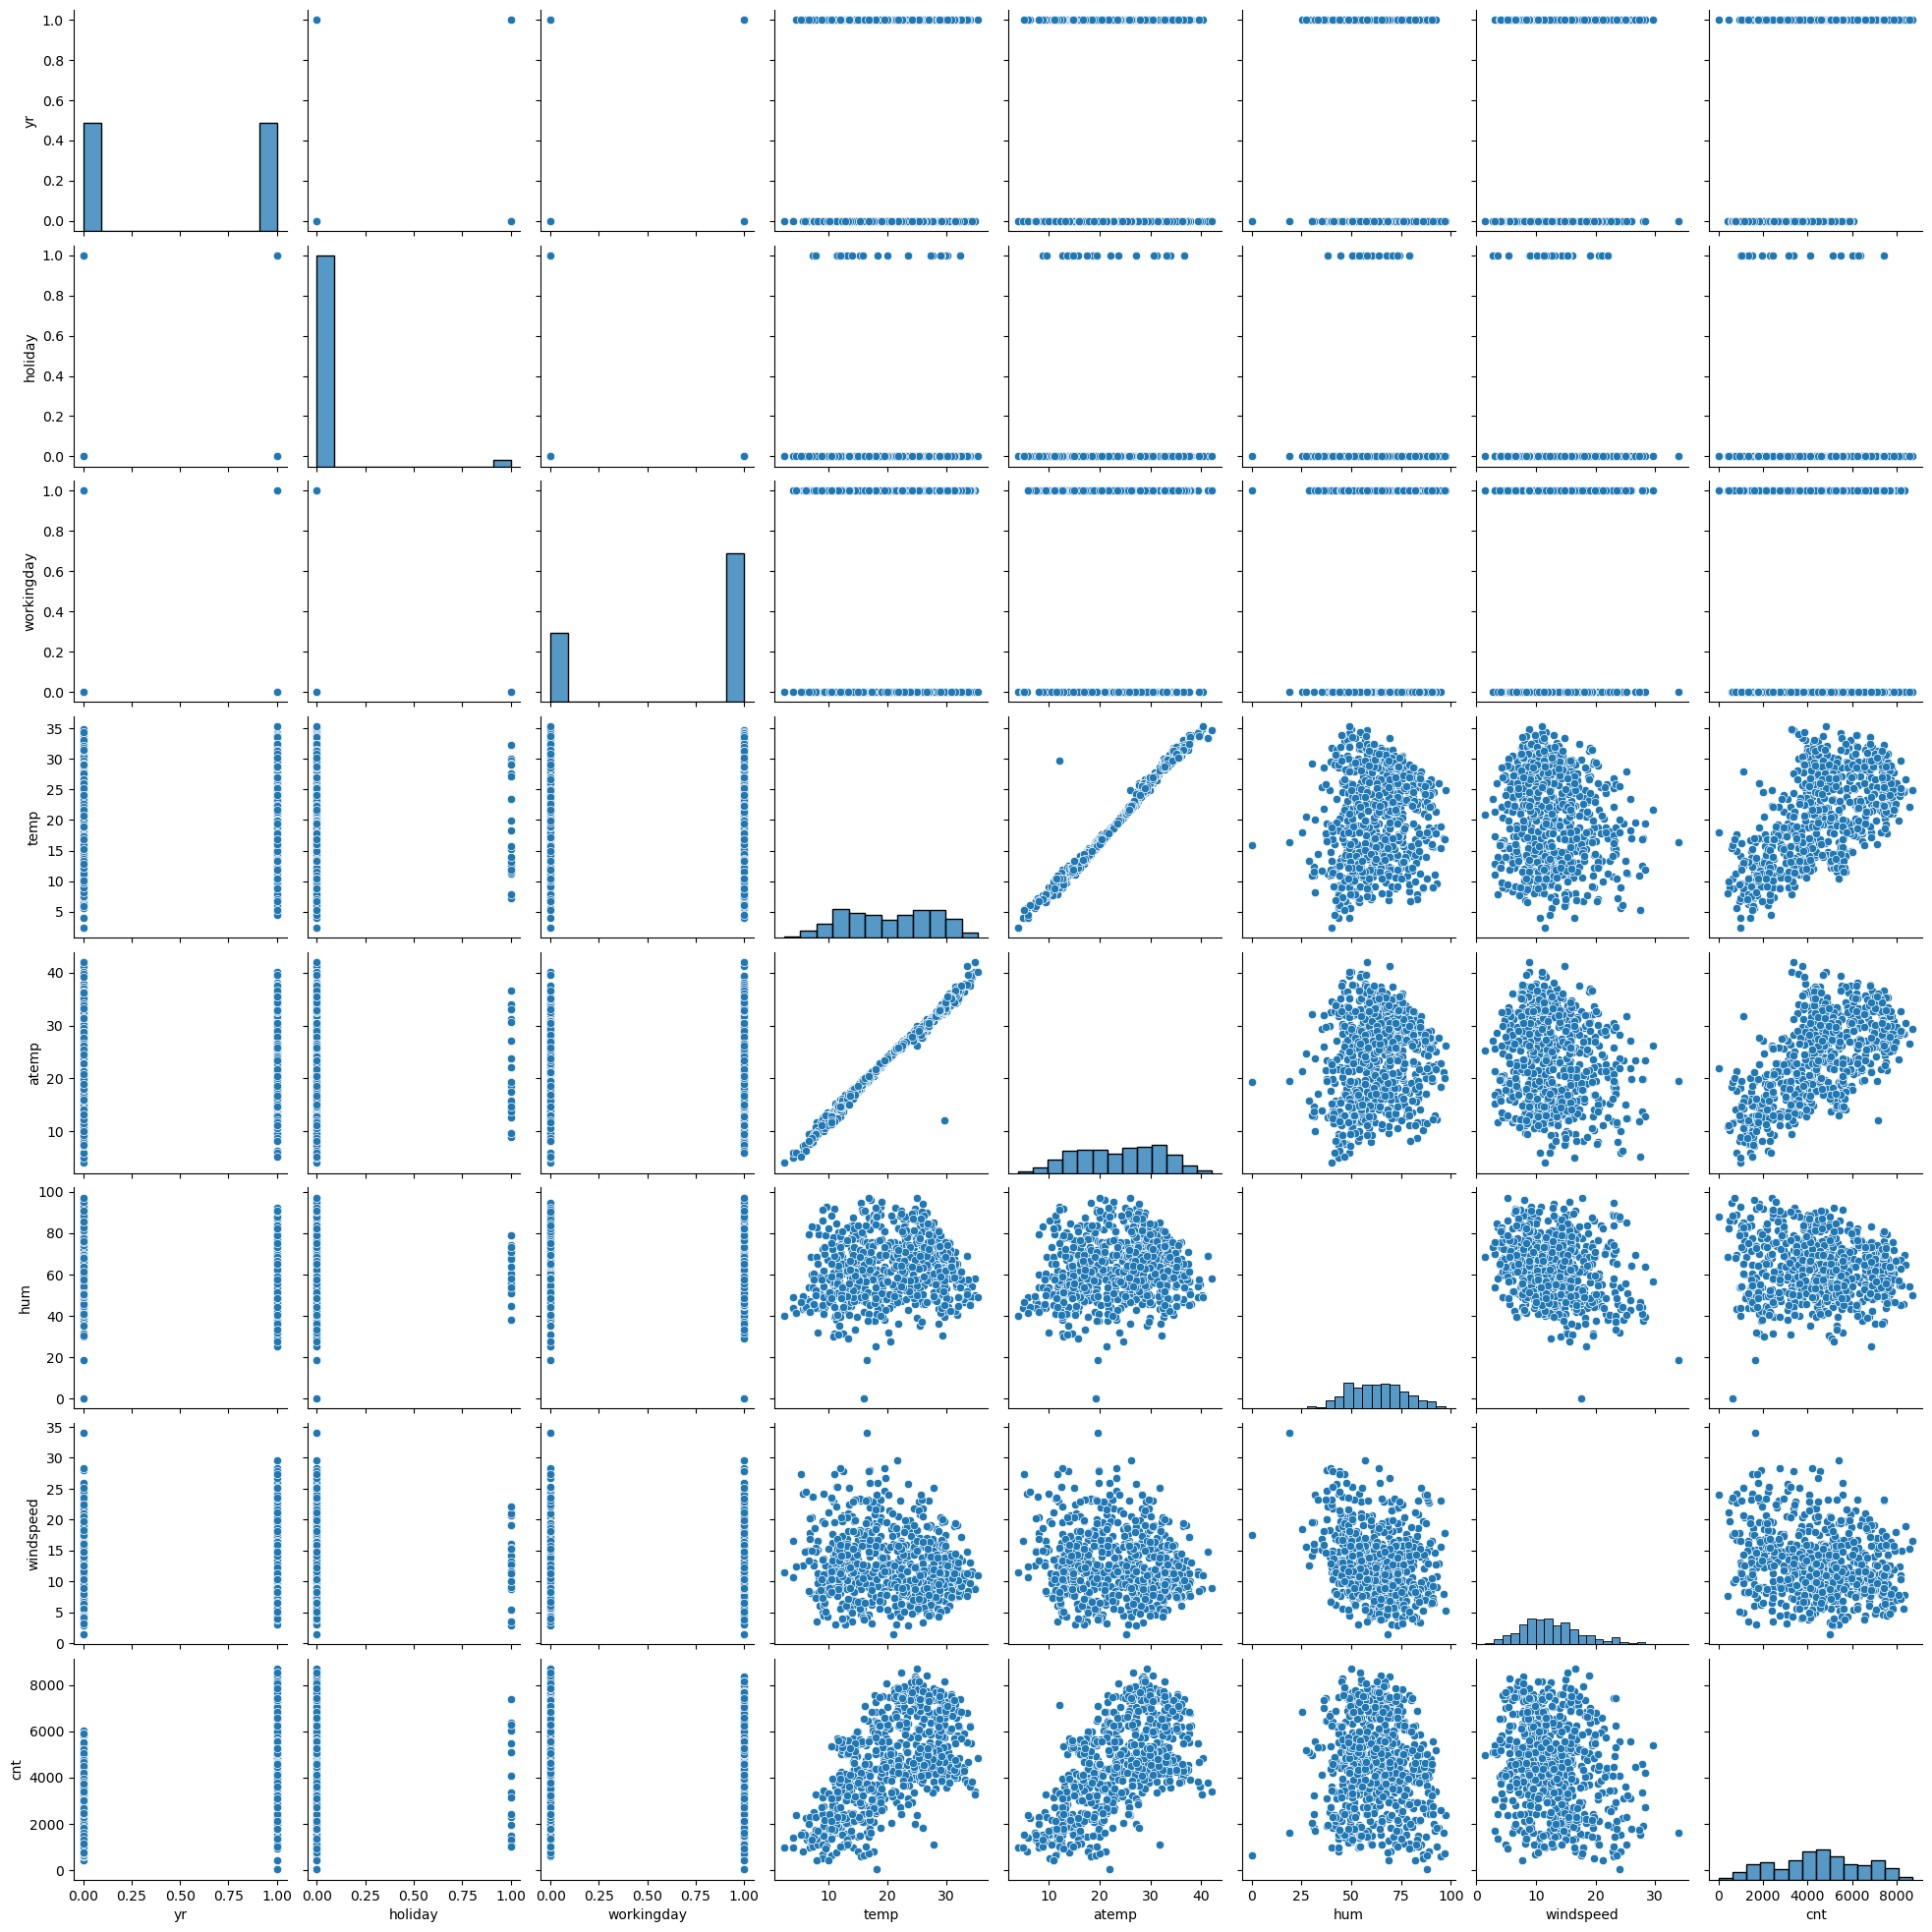

In [19]:
#Visualizing the numeric variables
sns.pairplot(bikesharing)
plt.show()

#### From the pairplots, We can see that there are atleast some numeric variables which have a linear relationship
Hence we should consider a Linear relationship

Additionally below are the inferences:
    - cnt and temp are highly correlated
    - cnt and atemp are highly correlated

In [20]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


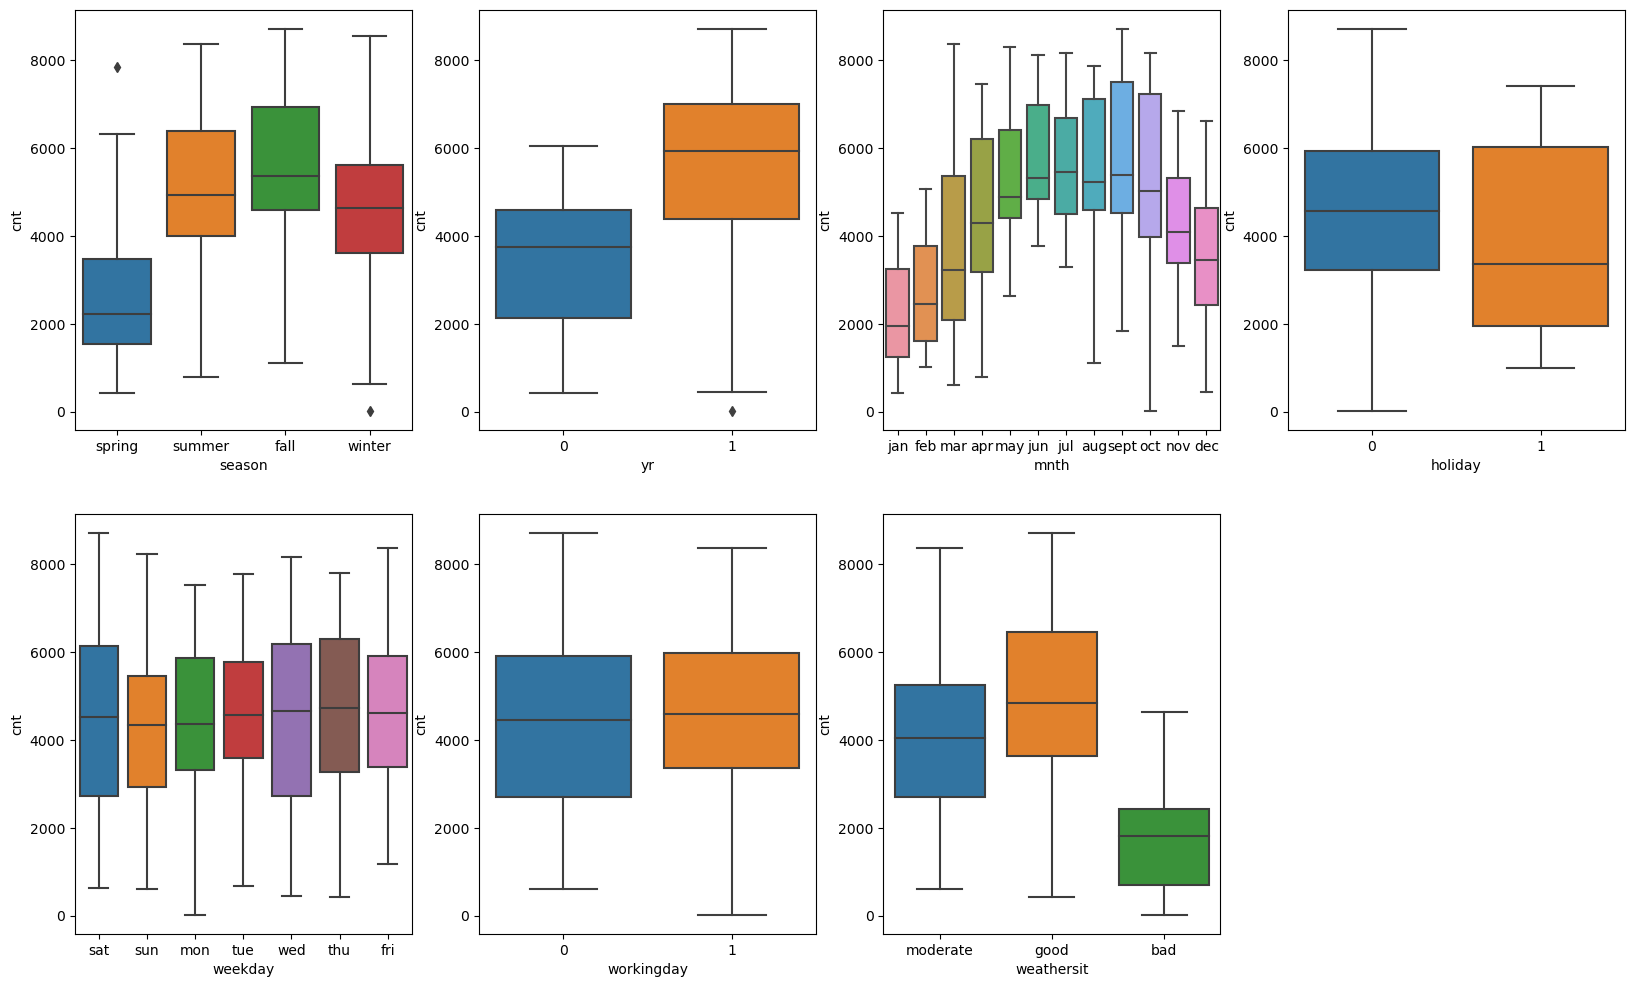

In [21]:
#Visualising the categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bikesharing)
plt.show()

### From the boxplots, we can see that:
    -  count of total rental bikes is higher during the fall season and relatively low in spring season
    -  count of total rental bikes increases significantly in the year 2019 from 2018
    -  count of total rental bikes increases somewhat linearly in first half of the year and then it starts decreasing
    -  count of total rental bikes is higher on days(other than holidays), probably because people commute to office
    -  count of total rental bikes is higher during clear weather and dips during rainy days

### Step 2: Preparing the dataset for Modelling
    - Encoding: 
    - Converting Binary Variables to 0/1 
    - Other Categorical variables to dummy variables
    - Splitting the data into train and test  
    - Rescaling of variables

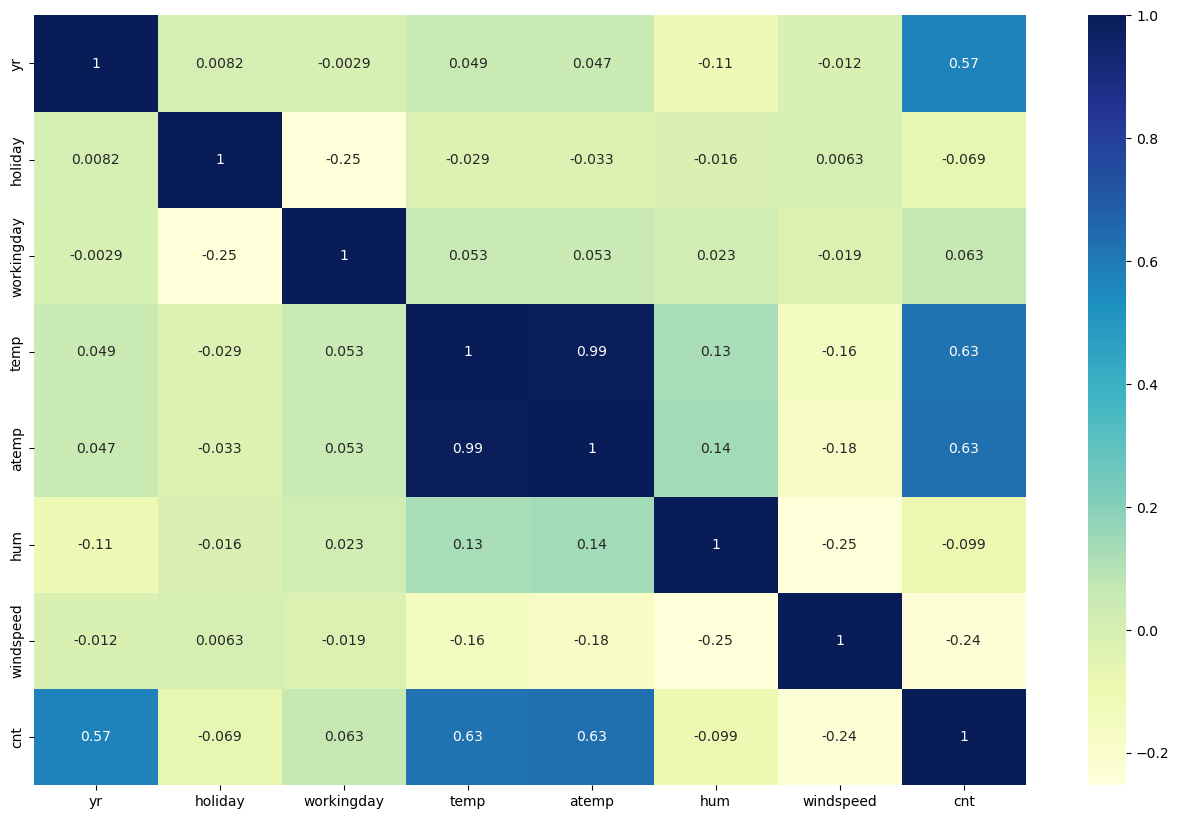

In [22]:
#Creating a heatmap
plt.figure(figsize = (16,10))
sns.heatmap(bikesharing.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [23]:
print(bikesharing.season.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [24]:
print(bikesharing.yr.value_counts())

0    365
1    365
Name: yr, dtype: int64


In [25]:
#From the Heatmap, we can see that count of total rental bikes is highly correlated with temp and atemp
    # - However, we need to do the encoding and scaling first

#### Dummy Variable Encoding

In [26]:
bikesharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,thu,1,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,fri,1,moderate,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,sat,0,moderate,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,sun,0,good,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,mon,1,good,6.184153,7.54440,48.2917,14.958889,1321


In [27]:
bikesharing.shape

(730, 12)

In [28]:
status = pd.get_dummies(bikesharing["season"])
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [29]:
#Dropping the redundant dummy variable
status1 = pd.get_dummies(bikesharing["season"],drop_first='True')
status1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
status2 = pd.get_dummies(bikesharing["mnth"],drop_first='True')
status2.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
status3 = pd.get_dummies(bikesharing["weekday"],drop_first='True')
status3.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [32]:
status4 = pd.get_dummies(bikesharing["weathersit"])
status4.head()

,bad,good,moderate
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [33]:
# concat the dummy dataframe with original 'bikesharing' dataframe
bikesharing = pd.concat([bikesharing,status1,status2,status3,status4],axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,0,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,0,1,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,1,0


In [34]:
bikesharing.shape

(730, 35)

In [35]:
bikesharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#Print columns after creating dummies
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'bad', 'good', 'moderate'],
      dtype='object')

In [37]:
#Drop season,mnth, weekday,weathersit coloumns
bikesharing = bikesharing.drop('season', axis=1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,0,0,1
2,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,...,0,1,0,0,0,0,0,0,1,0
3,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,1,0
4,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,1,0,1,0


In [38]:
bikesharing = bikesharing.drop('mnth', axis=1)
bikesharing.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,0,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,1,0,0,0,0,0,1
2,0,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,...,0,1,0,0,0,0,0,0,1,0
3,0,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,1,0
4,0,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,1,0


In [39]:
bikesharing = bikesharing.drop('weekday', axis=1)
bikesharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,0,0,0,moderate,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,1,0


In [40]:
import os
os.getcwd()

'C:\\Users\\bhara\\OneDrive\\Documents\\Data Science\\Course by Upgrad\\Course 5\\Bike sharing assignment\\Git check'